<a href="https://colab.research.google.com/github/AkshayBhansali18/Neural-Network/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset=pd.read_csv('student_scores2.csv')

In [123]:
dataset.head(10)

,Hours,IQ,Scores,Pass
0,2.3,80,18,0
1,5.0,80,45,1
2,3.2,70,25,0
3,8.5,90,72,1
4,3.5,70,30,0
5,1.5,80,20,0
6,9.2,100,88,1
7,5.5,90,60,1
8,8.3,100,81,1
9,2.7,90,25,0


In [0]:
passed=dataset[dataset['Pass']==1]

In [125]:
passed.head()

,Hours,IQ,Scores,Pass
1,5.0,80,45,1
3,8.5,90,72,1
6,9.2,100,88,1
7,5.5,90,60,1
8,8.3,100,81,1


In [0]:
failed=dataset[dataset['Pass']==0]

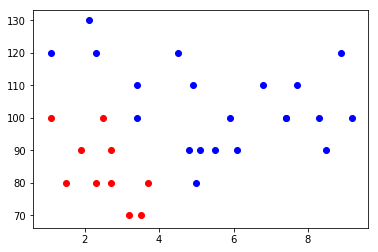

In [127]:
plt.scatter(passed['Hours'],passed['IQ'],c='blue')
plt.scatter(failed['Hours'],failed['IQ'],c='red')
plt.xlabel='Hours Studied'
plt.show()

In [0]:
x=dataset.loc[:,('Hours','IQ')].values
y=dataset.iloc[:,-1].values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)


array([[ 1.14911459,  0.16940942],
       [ 1.27337931,  0.82587092],
       [-0.79769931, -1.14351358],
       [ 0.90058516,  0.82587092],
       [ 0.15499685, -1.14351358],
       [ 0.19641842, -0.48705208],
       [-1.29475818, -1.14351358],
       [-0.79769931, -0.48705208],
       [-1.12907189, -0.48705208],
       [-0.50774831,  0.16940942],
       [ 0.36210471, -0.48705208],
       [ 1.52190874,  0.16940942],
       [-1.46044447,  1.48233242],
       [ 0.11357528,  0.82587092],
       [-0.88054246,  0.16940942],
       [-0.59059145, -1.79997509],
       [-0.9633856 , -1.14351358],
       [-0.38348359, -1.14351358],
       [-1.04622875,  2.13879393],
       [-0.50774831,  0.82587092]])

In [0]:
class NeuralNetwork():
  def __init__(self,input_size,output_size,hidden_units):
    self.input_size=input_size
    self.output_size=output_size
    self.hidden_units=hidden_units
    self.w1=np.zeros((self.input_size,self.hidden_units))
    self.w2=np.zeros((self.hidden_units,self.output_size))
  
  def forward(self,x_train):
    self.output_1=sigmoid(np.dot(x_train,self.w1))
    self.output_2=sigmoid(np.dot(self.output_1,self.w2))
    return self.output_2
  
  def backward(self,x_train,y_train):
    delta_w2=(self.output_2 - y_train) * sigmoid_prime(self.output_2)
    delta_w1=delta_w2.dot(self.w2.T) * sigmoid_prime(self.output_1)
    self.w1=self.w1- x_train.T.dot(delta_w1)
    self.w2=self.w2-self.output_1.T.dot(delta_w2)
    
    
  def fit(self,x_train,y_train):
    pred_val=self.forward(x_train)
    self.backward(x_train,y_train)
  def loss(self,x_train,y_train):
    y_pred=self.forward(x_train)
    self.calc_loss=np.mean(np.square(y_train-y_pred))
    return self.calc_loss
    

In [0]:
def sigmoid(s):
  return (1/(1+np.exp(-s)))
def relu(s):
  return np.max(0,s)
def sigmoid_prime(s):
  return s*(1-s)

In [0]:
nn=NeuralNetwork(2,1,3)

In [0]:
loss_val=[]
test_loss=[]
for i in range(200):
  nn.fit(x_train,y_train)
  loss_val.append(nn.loss(x_train,y_train))
  test_loss.append(nn.loss(x_test,y_test))


In [0]:
y_pred_final=[]
for i in range(len(x_test)):
  
  x_test1= x_test[i].reshape(2,1)
  op1=np.matmul(nn.w1.T,x_test1)
  op2=np.matmul(nn.w2.T,op1)
  if(sigmoid(op2)>0.5):
     y_pred_final.append(1)
  else:
     y_pred_final.append(0)
    
 
    

In [149]:
y_pred_final

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]

In [153]:
y_test=np.array(y_test)
y_test


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [155]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred_final)
cf

array([[2, 0],
       [1, 8]])

In [156]:
accuracy=(10/11)
print(accuracy)

0.9090909090909091
